# Principal Component Analysis      
#### Personal Notes 

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

Suppose that we have a dataset $\mathbf{X}$ of $N$ points and $p$ features (i.e : $\mathbf{X} \in \mathbb{M}_{n,p} \left( \mathbb{R} \right)$)      
If we end up in a situation where $p$ is too big (either arbitrary too big or if the decision process is that $p$ >>> $N$) then we could be willing to reduce the dimension of our problem, i.e : find a subspace of dimension $k$ such that $k < p$ that would be "relevant" to our problem.      
Be relevant we mean that we want to end up with a smaller number of features but those that maximise the predictive power.      

Therefore we need to find a way to determine : 
- What dimension should be the latent space ? 
- How to find the features that maximise the predictive power ? 

As the goal of a PCA is to reduce the dimension of the problem, we have to determine "which dimension" ... 

There are two ways to start the PCA algorithm : 

First we can compute the **E**igen **V**alue **D**ecomposition on the correlation matrix $S = \mathbf{X}^T \mathbf{X}$    
Or we can compute the **S**ingular **V**alue **D**ecomposition on the matrix $\mathbf{X}$

In [96]:
N = 500
k = 2 # true number of features
p = 8 # total number of features 
mu_arr = np.random.randint(low = -5, high= 5, size= k)
std_arr = np.random.randint(low = 1, high= 4, size= k)

eps = np.random.normal(0, 3, size = (N ,p-k))
indexes = np.random.choice(np.arange(k), size=p-k, replace=True)

X = np.random.normal(mu_arr, std_arr, size = (N,k))
X = np.concatenate([X,np.cumsum(X[:,indexes], axis = 1) + eps],axis = 1)

In [97]:
X

array([[ -7.23381203,   2.84894433,  -9.47447239, ...,  -9.70119557,
         -4.34042188, -15.15222352],
       [ -6.980674  ,   1.47418378,  -7.65424533, ...,  -7.90060287,
        -16.28805769, -18.00864993],
       [ -6.25583506,   0.9978407 ,  -3.77459371, ..., -12.96148924,
         -8.81645714, -20.86887057],
       ...,
       [ -3.8947421 ,  -0.25051529,   2.24233811, ..., -11.12627005,
         -3.1338072 , -11.02721361],
       [ -2.90451827,  -0.79689384,  -1.25631731, ...,  -9.39132731,
         -6.85649147, -13.3350499 ],
       [  1.42296655,   0.66715642,   1.9361445 , ...,   2.86089099,
          3.5274589 ,   4.24698855]])

In [98]:
empirical_mean = X.mean(axis = 0)
empirical_std = X.std(axis = 0)

In [99]:
print(empirical_mean)
print(empirical_std)

[ -5.08876912   0.96475952  -5.1467032   -3.94296321  -3.22011414
  -8.28139728  -7.20103883 -12.53872622]
[ 3.03392255  2.10542094  4.23787868  4.74091979  5.67147516  7.60286243
  8.63912055 11.0777312 ]


In [100]:
X_std = (X - empirical_mean) / empirical_std

In [101]:
X_std

array([[-0.70701967,  0.89492071, -1.02121121, ..., -0.18674523,
         0.33112363, -0.23592352],
       [-0.62358377,  0.24195839, -0.59169748, ...,  0.05008566,
        -1.05184536, -0.49377653],
       [-0.38467229,  0.01571238,  0.32377272, ..., -0.61556973,
        -0.18698875, -0.75197206],
       ...,
       [ 0.39355883, -0.57721227,  1.74357075, ..., -0.37418443,
         0.47079232,  0.13644604],
       [ 0.71994285, -0.83672264,  0.91800313, ..., -0.14598844,
         0.03988223, -0.07188509],
       [ 2.14630913, -0.14135088,  1.67131913, ...,  1.46553859,
         1.24185068,  1.51526648]])

In [114]:
U, S, Vt = np.linalg.svd(X_std, full_matrices=False)

In [115]:
S

array([51.48848714, 26.87397496, 15.00911591, 12.82596999, 10.71821765,
        8.13390146,  6.63847091,  3.44038614])

In [104]:
exp_var_pca = S**2/np.sum(S**2)
cum_sum_explained_var = np.cumsum(exp_var_pca)

In [105]:
exp_var_pca

array([0.66276608, 0.18055263, 0.05631839, 0.04112638, 0.02872005,
       0.01654009, 0.01101732, 0.00295906])

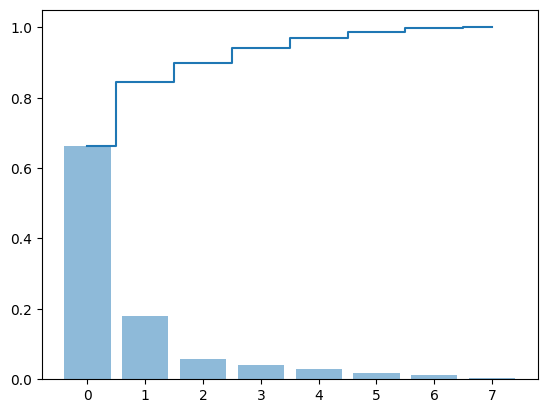

In [106]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_explained_var)), cum_sum_explained_var, where='mid',label='Cumulative explained variance')

In [108]:
Vt[:k, :] 

array([[ 0.33392528,  0.23654936,  0.28195698,  0.34923841,  0.35918638,
         0.40494653,  0.40435913,  0.41781365],
       [-0.48498393,  0.66899833, -0.47226322, -0.02753934,  0.26417572,
         0.00479288,  0.15123   , -0.02754201]])